# In this Notebook we perform the following activities

### 1. Import the required Libraries
### 2. Load the previously Trained Model
### 3. Make Predictions
### 4. Use OCR for extracting Text Info



### 1. Importing Required Libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

### 2. Load the previously Trained Model

In [3]:
model=tf.keras.models.load_model('C:\\Users\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\4_models\\object_detection_inception_300.h5')
print("Model Loaded successfully")

Model Loaded successfully


In [44]:
path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N118.jpeg'
image=load_img(path) # PIL Object
image = np.array(image,dtype=np.uint8) # 8 bit array - Range(0,255)
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0 # convert to array and get the normalized output


In [45]:
# Print Size of Original image
h,w,d=image.shape
print("height-",h)
print("width-",w)
print("depth-",d)

height- 960
width- 1280
depth- 3


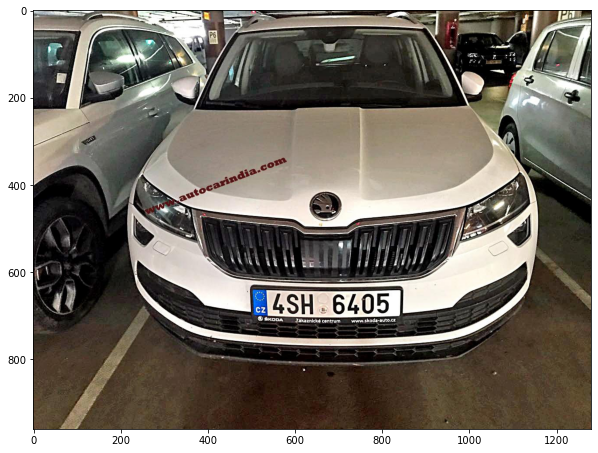

In [46]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [47]:
image_arr_224.shape

(224, 224, 3)

In [48]:
test_array=image_arr_224.reshape(1,224,224,3)
test_array.shape

(1, 224, 224, 3)

## 3. Make Predictions

In [49]:
coords=model.predict(test_array)
coords

array([[0.43138027, 0.674432  , 0.65971243, 0.7256752 ]], dtype=float32)

In [50]:
# Denormalize output
denorm=np.array([w,w,h,h])
coords=coords * denorm
coords

array([[552.16674805, 863.27293396, 633.32393646, 696.64821625]])

In [51]:
coords=coords.astype(np.int32)
coords

array([[552, 863, 633, 696]])

(552, 633) (863, 696)


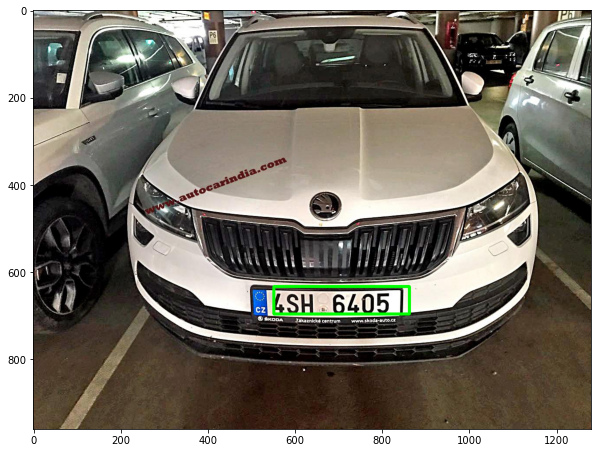

In [53]:
## Drawing a Bound Box on top of this image
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),5)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Creating Pipeline

In [57]:
path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N207.jpeg'
def object_detection(path):
    # read image
    image=load_img(path) # PIL Object
    image = np.array(image,dtype=np.uint8) # 8 bit array - Range(0,255)
    image1=load_img(path,target_size=(224,224))
    # Preprocessing
    image_arr_224=img_to_array(image1)/255.0 # convert to array and get the normalized output

    h,w,d=image.shape
    test_array=image_arr_224.reshape(1,224,224,3)
    #test_array.shape
    #Make Predictions
    coords=model.predict(test_array)
    denorm=np.array([w,w,h,h])
    
    #denormalize the output
    coords=coords * denorm
    coords=coords.astype(np.int32)

    ## Drawing a Bound Box on top of this image
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)

    #plt.figure(figsize=(10,8))
    #plt.imshow(image)
    #plt.show()
    return image,coords

(1750, 1714) (2463, 1864)


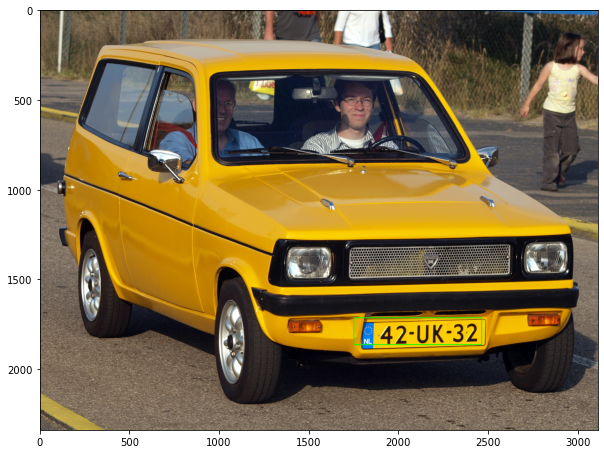

In [58]:
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N208.jpeg'
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N208.jpeg'
path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N2.jpeg'
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N147.jpeg'
image,coords=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## 4. Use OCR for extracting Text Info - pytesseract

In [59]:
import pytesseract as pt

(94, 222) (397, 288)


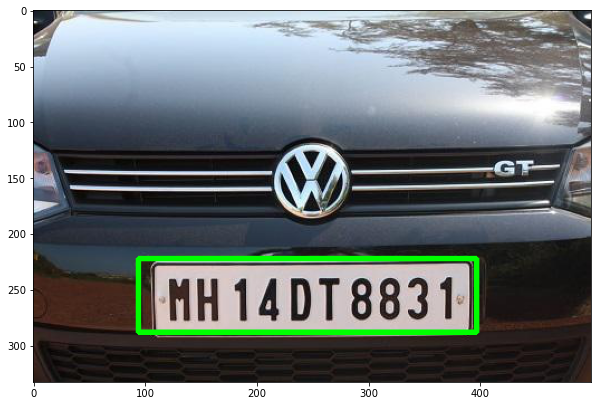

In [42]:
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\download3.jpg'
path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N50.jpeg'
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N208.jpeg'
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N2.jpeg'
#path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N147.jpeg'
image,coords=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [44]:
path='C:\\Users\\DELL\\anaconda3\\CS_2\\vehicle_plate\\Project_Files\\test_images\\N50.jpeg'
img=np.array(load_img(path))
xmin,xmax,ymin,ymax=coords[0]
roi=img[ymin:ymax,xmin:xmax]

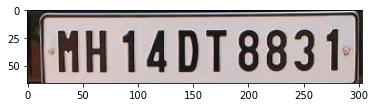

In [45]:
plt.imshow(roi)
plt.show()

In [46]:
## Extract text from image
pt.image_to_string(roi)

'mHH14DT8831l\n\n'